### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### Reading csv file that we'll be using

In [3]:
df = pd.read_csv(r"../Data/data.csv") 

### Initial data inspection

In [4]:
df.columns

Index(['Campaign_ID', 'Channel', 'Product_Category', 'Region', 'Budget',
       'Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 'Revenue',
       'ROI', 'Duration', 'Start_Date', 'End_Date', 'Customer_Satisfaction',
       'Campaign_Effectiveness', 'Market_Segment'],
      dtype='object')

In [97]:
df.head(1)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.0,0.3414,849005.0,0.64,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium


In [7]:
df.shape # To see dimensions

(5000, 19)

In [70]:
df.dtypes 

Campaign_ID                object
Channel                    object
Product_Category           object
Region                     object
Budget                    float64
Spend                     float64
Impressions               float64
Clicks                    float64
CTR                       float64
Conversions               float64
CR                        float64
Revenue                   float64
ROI                       float64
Duration                  float64
Start_Date                 object
End_Date                   object
Customer_Satisfaction     float64
Campaign_Effectiveness    float64
Market_Segment             object
dtype: object

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign_ID             4741 non-null   object 
 1   Channel                 4746 non-null   object 
 2   Product_Category        4733 non-null   object 
 3   Region                  4739 non-null   object 
 4   Budget                  4500 non-null   float64
 5   Spend                   4501 non-null   float64
 6   Impressions             4496 non-null   float64
 7   Clicks                  4514 non-null   float64
 8   CTR                     4502 non-null   float64
 9   Conversions             4506 non-null   float64
 10  CR                      4504 non-null   float64
 11  Revenue                 4491 non-null   float64
 12  ROI                     4505 non-null   float64
 13  Duration                4521 non-null   float64
 14  Start_Date              4741 non-null   

In [98]:
df.describe()

,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,4.500000e+03,4.501000e+03,4.496000e+03,4514.000000,4502.000000,4506.000000,4504.000000,4.491000e+03,4505.000000,4521.000000,4508.000000,4510.000000
mean,3.196766e+05,2.754637e+05,6.050865e+05,27467.000985,0.585820,5591.891502,0.556345,5.962208e+05,2.816823,200.590123,3.491172,6.418550
std,7.511176e+05,3.985757e+05,1.643209e+06,23203.538244,0.800421,5629.011928,0.580404,7.834836e+05,2.769284,173.398322,4.180570,7.773072
min,1.001400e+04,1.000000e+00,1.593000e+03,104.000000,0.000500,13.000000,0.000300,0.000000e+00,0.000000,1.000000,1.000000,1.000000
25%,1.379872e+05,1.113680e+05,2.624278e+05,12713.750000,0.250425,2604.250000,0.261425,2.574585e+05,1.270000,94.000000,2.000000,3.000000
50%,2.659450e+05,2.292810e+05,5.089675e+05,26232.000000,0.500150,5076.500000,0.507450,5.093340e+05,2.610000,188.000000,3.000000,6.000000
75%,3.855895e+05,3.445920e+05,7.663295e+05,38618.250000,0.760400,7578.000000,0.755375,7.717310e+05,3.830000,278.000000,4.000000,8.000000
max,4.175610e+07,4.317430e+06,9.991660e+07,250409.021300,9.570650,67712.567350,7.369659,9.717200e+06,29.526004,1911.832921,46.055439,88.914949


In [11]:
df.duplicated().sum()

np.int64(0)

### Columns Nulls (%)

In [10]:
df.isnull().sum() / df.shape[0] * 100 #La cantidad de datos nulos en porcentaje por Columna

Campaign_ID                5.18
Channel                    5.08
Product_Category           5.34
Region                     5.22
Budget                    10.00
Spend                      9.98
Impressions               10.08
Clicks                     9.72
CTR                        9.96
Conversions                9.88
CR                         9.92
Revenue                   10.18
ROI                        9.90
Duration                   9.58
Start_Date                 5.18
End_Date                   5.14
Customer_Satisfaction      9.84
Campaign_Effectiveness     9.80
Market_Segment             5.24
dtype: float64

<Axes: >

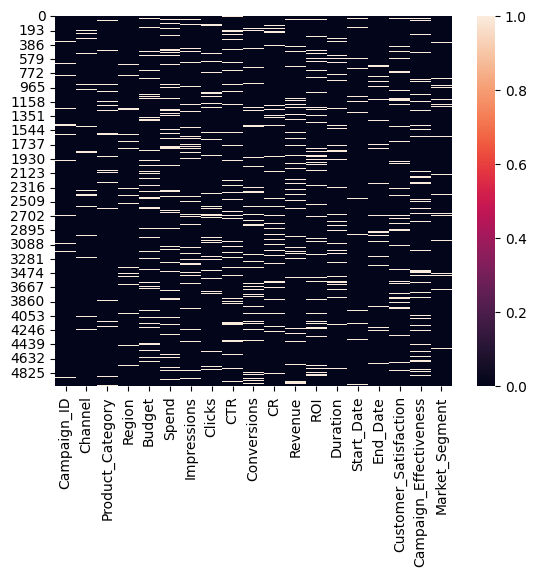

In [12]:
sns.heatmap(df.isnull(), cbar=True)

### Rows Nulls

In [13]:
nulls_by_row = (df.isnull().sum(axis=1)).sort_values(ascending=False)
nulls_by_row

#Vemos que la fila a la que más datos le faltan son 7, por lo tanto no vale la pena eliminarlas, vamos a intentar arreglarlas. 

1250    7
1669    7
2321    7
2694    7
1117    6
       ..
3963    0
3962    0
3950    0
3941    0
4976    0
Length: 5000, dtype: int64

# Limpieza de datos

Estas son las variables que escalaría ya que en todos los casos existen datos muy dispares entre máximos y mínimos

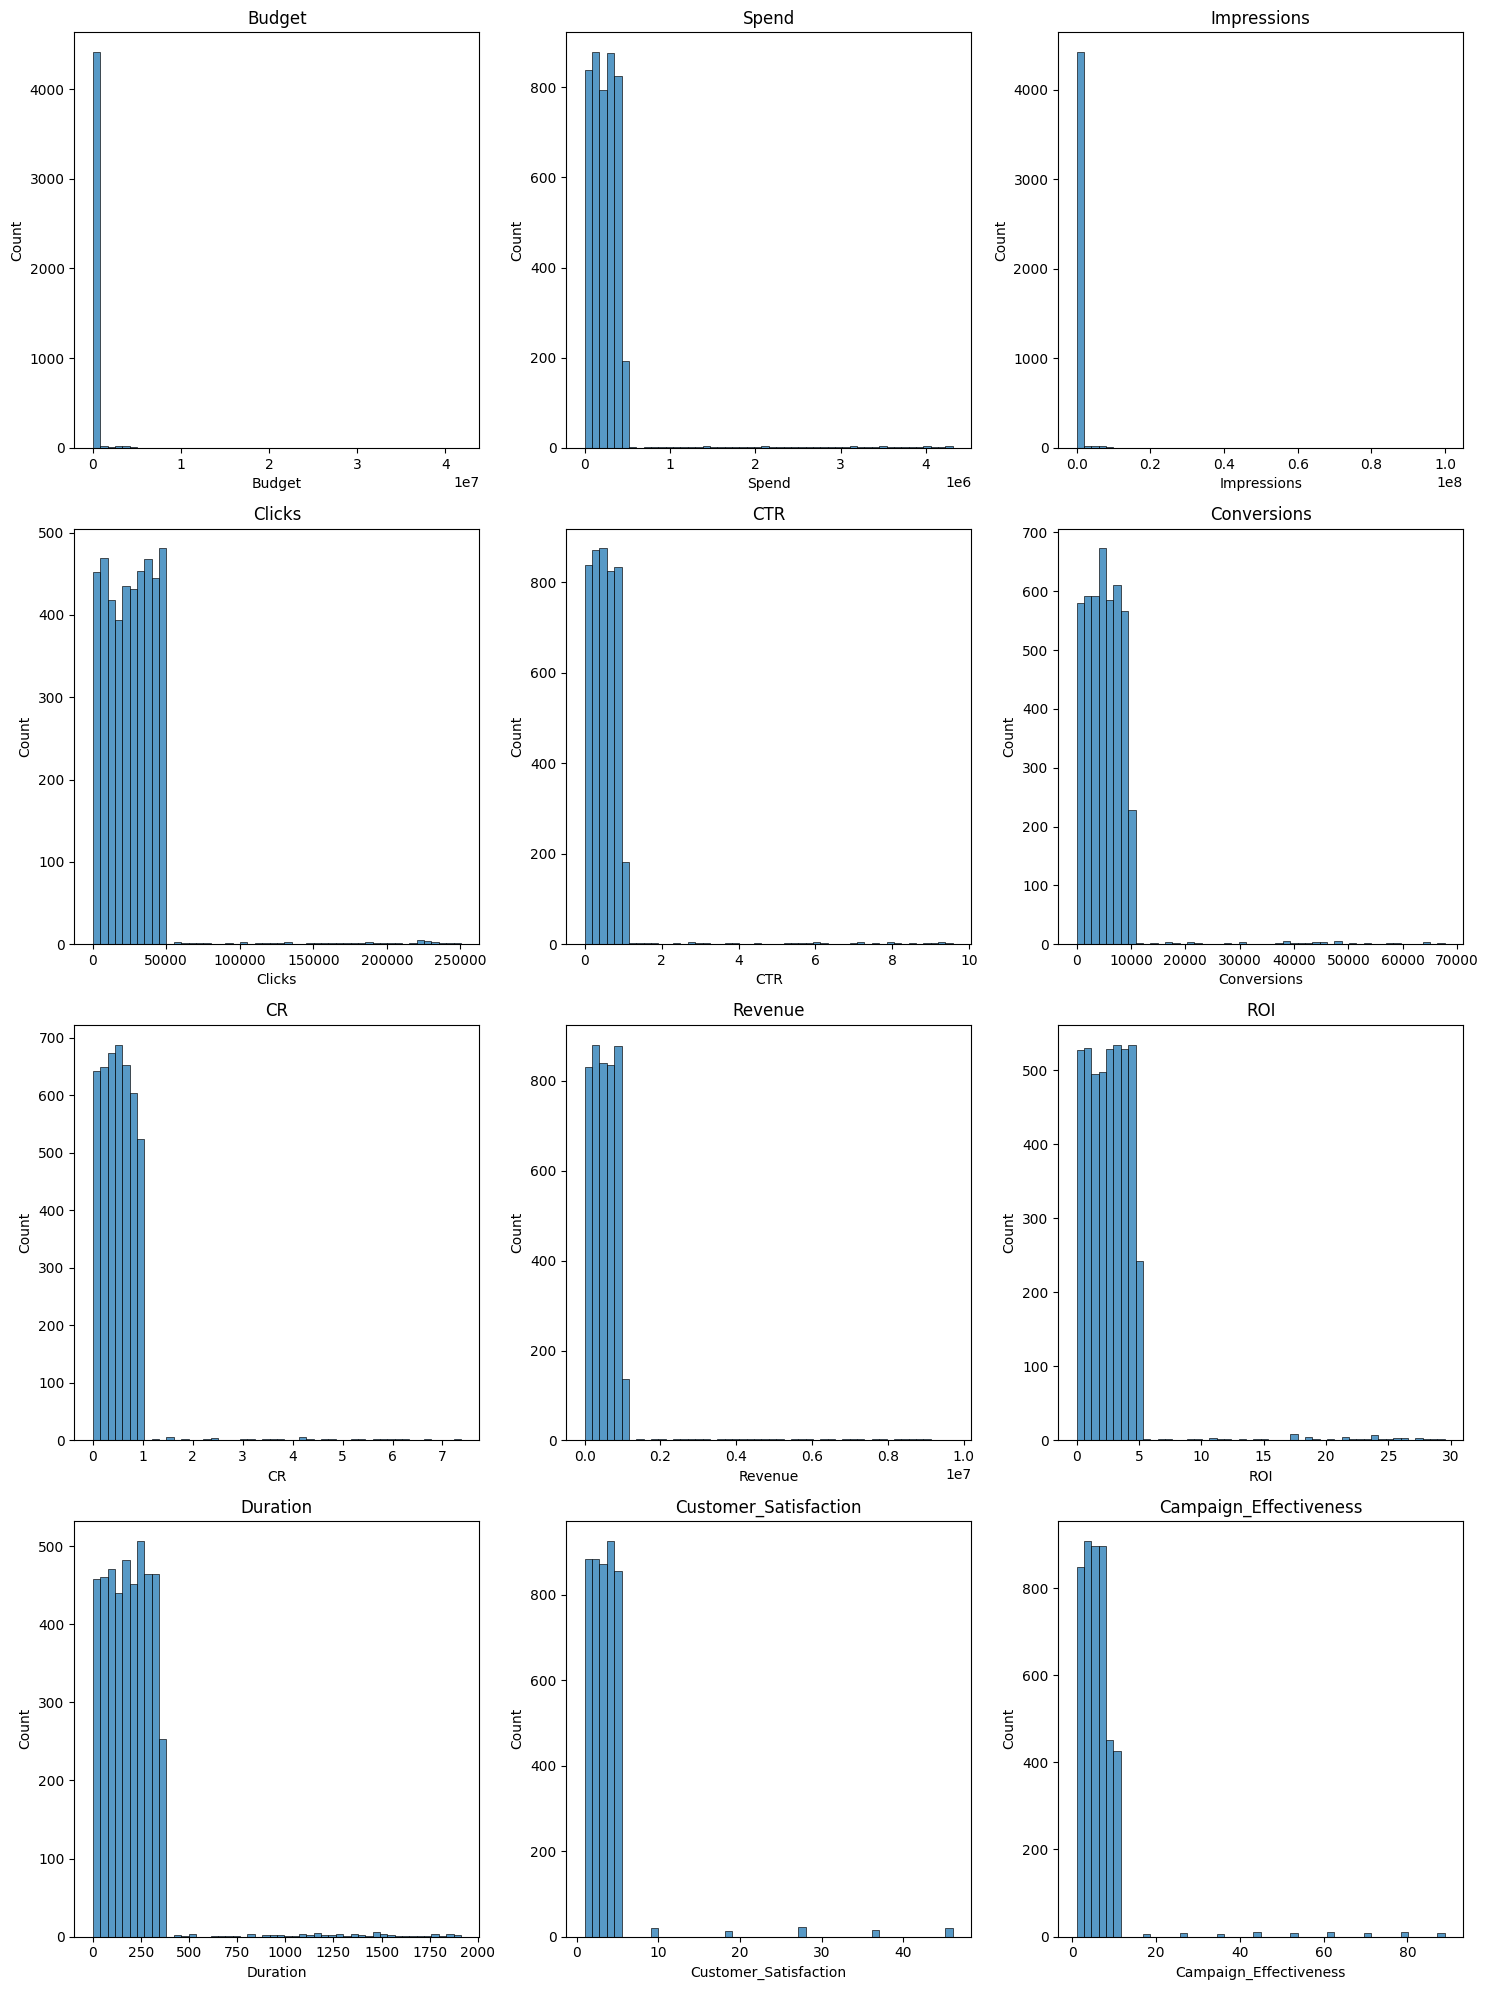

In [29]:
# sacar una lista de variables numericas
numeric_columns = df.select_dtypes(include = "number").columns

# Graficar la distribucion de las variables numericas con un hisplot y un bucle
# Definir el tamaño del lienzo
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Graficar la distribución de las variables numéricas
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=50, ax=axes[i])
    axes[i].set_title(col)

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()


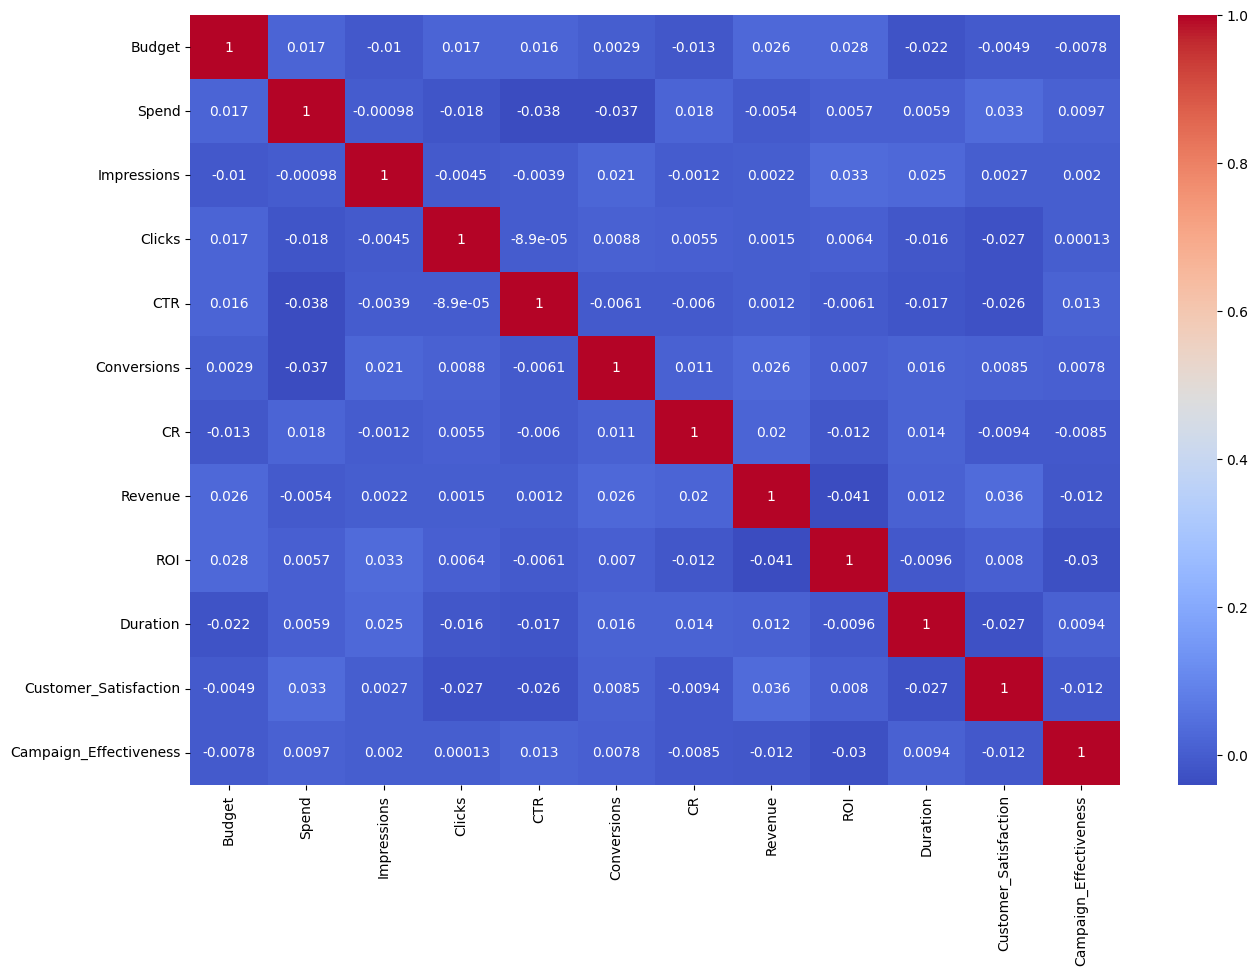

In [27]:
#sns spearman con las variables numericas y aproximamos quitar las que no tengan correlacion
correlation = df.corr(method="spearman",numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

#Es muy raro que no haya correlacion entre las variables.

In [28]:
variable_categories = df.select_dtypes(include = "object").columns
#Valores unicos
for col in variable_categories:
    print(f"{col}: {df[col].unique()}")

Campaign_ID: ['CAM0001' 'CAM0002' 'CAM0003' ... 'CAM4998' 'CAM4999' 'CAM5000']
Channel: ['Billboard' nan 'Radio' 'Email' 'TV' 'Social Media' 'News']
Product_Category: ['Fashion' 'Health' 'Electronics' 'Automotive' 'Groceries' nan]
Region: ['Kuala Lumpur' 'Sarawak' 'Penang' nan 'Johor' 'Sabah' 'Malacca']
Start_Date: ['2/3/2023' nan '12/4/2023' '24/4/2023' '10/1/2023' '16/8/2023'
 '21/6/2023' '13/6/2023' '22/5/2023' '26/1/2023' '20/6/2023' '19/11/2023'
 '18/2/2023' '7/1/2023' '1/12/2023' '5/5/2023' '18/12/2023' '28/11/2023'
 '3/3/2023' '4/8/2023' '25/7/2023' '6/10/2023' '2/4/2023' '16/3/2023'
 '7/9/2023' '28/6/2023' '22/3/2023' '18/1/2023' '16/9/2023' '21/2/2023'
 '28/1/2023' '26/8/2023' '13/4/2023' '13/8/2023' '2/2/2023' '24/2/2023'
 '19/1/2023' '23/6/2023' '29/1/2023' '15/4/2023' '29/4/2023' '12/3/2023'
 '28/2/2023' '28/8/2023' '9/12/2023' '1/5/2023' '14/10/2023' '25/9/2023'
 '13/1/2023' '7/6/2023' '1/7/2023' '10/8/2023' '23/4/2023' '12/6/2023'
 '14/9/2023' '11/10/2023' '30/12/2023' '3

In [81]:
df["Impressions"].max() #Tiene un máximo de 99M

np.float64(99916600.0)

In [82]:
df["Impressions"].min() # Y un mínimo de 1593

np.float64(1593.0)

Escalamos

In [ ]:
scaler = StandardScaler()
df['Impressions'] = scaler.fit_transform(df[['Impressions']])
df["Clicks"] = scaler.fit_transform(df[["Clicks"]])

Una vez escaladas las variables debemos decidir si queremos reparar los nulls con la media o si lo hacemos con encoding y posteriormente knn 

### FILLING NUMERIC VALUES

In [79]:
df_numeric_filled = df.fillna(mean_values)

In [80]:
df_numeric_filled.isnull().sum() / df.shape[0] * 100 

# We can see that that we dont have nulls on numeric columns anymore

Campaign_ID               5.18
Channel                   5.08
Product_Category          5.34
Region                    5.22
Budget                    0.00
Spend                     0.00
Impressions               0.00
Clicks                    0.00
CTR                       0.00
Conversions               0.00
CR                        0.00
Revenue                   0.00
ROI                       0.00
Duration                  0.00
Start_Date                5.18
End_Date                  5.14
Customer_Satisfaction     0.00
Campaign_Effectiveness    0.00
Market_Segment            5.24
dtype: float64

<Axes: >

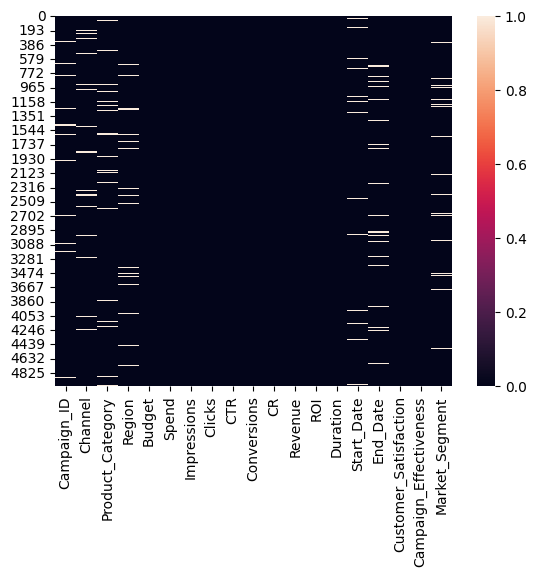

In [81]:
sns.heatmap(df_numeric_filled.isnull(), cbar=True)

In [82]:
# {Esto lo podemos hacer con un inplace al momento de hacer el fill pero quería ver los resultados en un nuevo data frame antes de agregarlos a la original. 
# (df.fillna(df.mean(), inplace=True)}
df = df_numeric_filled

In [18]:
df.isnull().sum() / df.shape[0] * 100 

Campaign_ID                5.18
Channel                    5.08
Product_Category           5.34
Region                     5.22
Budget                    10.00
Spend                      9.98
Impressions               10.08
Clicks                     9.72
CTR                        9.96
Conversions                9.88
CR                         9.92
Revenue                   10.18
ROI                        9.90
Duration                   9.58
Start_Date                 5.18
End_Date                   5.14
Customer_Satisfaction      9.84
Campaign_Effectiveness     9.80
Market_Segment             5.24
dtype: float64

### FILL STR VALUES

El caso es que puedo utilizar la moda pero primero seria bueno analizar cuantas veces se repite la moda en cada columna ya que la moda puede tener una frecuencia no muy superior a otro valor por ejemplo puede ser 10 veces cuando otro valor quizas se repite 9
En ese caso no seria muy correcto utilizar la moda

Lo que yo haría: 

1- Ver cual es la moda <br/>
2- Ver cuantas veces se repite<br/>
3- Cuanto equivale del total de datos<br/>